# PART3 パラメータをチューニングしてみよう

## おまじない

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [38]:
train = pd.read_csv("/root/Case2/train.csv")
test = pd.read_csv("/root/Case2/test.csv")
sample = pd.read_csv("/root/Case2/submit_sample.csv",header=None)

## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [39]:
trainX = train.iloc[:,0:17]

In [40]:
trainX.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success


## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [41]:
y = train["y"]

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [42]:
testX = test.copy()

## trainXとtestXをダミー変数化しましょう

In [43]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [44]:
clf1 = DT(max_depth=2,min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [46]:
cross_validate(clf1,trainX,y,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)

{'fit_time': array([ 0.05200791,  0.05194688,  0.0520041 ,  0.05193639,  0.05356407]),
 'score_time': array([ 0.00389266,  0.00390863,  0.00393128,  0.00391173,  0.0039432 ]),
 'test_score': array([ 0.74657601,  0.76182968,  0.73117591,  0.73708019,  0.75909278]),
 'train_score': array([ 0.74534692,  0.74543889,  0.75305367,  0.75162308,  0.74613685])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [9]:
clf2 = DT(max_depth=10,min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [47]:
cross_validate(clf2,trainX,y,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)

{'fit_time': array([ 0.11585236,  0.11294746,  0.11451244,  0.11415172,  0.1122756 ]),
 'score_time': array([ 0.00445342,  0.00457883,  0.00448585,  0.00454593,  0.00456643]),
 'test_score': array([ 0.88264002,  0.88482571,  0.86778474,  0.89240308,  0.88344359]),
 'train_score': array([ 0.88842017,  0.89038512,  0.89288003,  0.88763037,  0.88561317])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [48]:
clf3 = DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [49]:
parameters = {"max_depth":[2,3,4,5,6,7,8,9,10]}

In [50]:
parameters = {"max_depth":list(range(2,11))}

In [51]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [52]:
gcv = GridSearchCV(clf3,parameters,cv=5,scoring="roc_auc",n_jobs=-1)
gcv.fit(trainX,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

## グリッドサーチの結果を見てみましょう
- cv_____results_で結果を見る事が出来ます

In [53]:
gcv.cv_results_

/root/jupyter/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/jupyter/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/jupyter/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/jupyter/lib/python3.6/site-packages/sklearn/utils/depr

{'mean_fit_time': array([ 0.05356894,  0.06770754,  0.08248587,  0.09597769,  0.11068678,
         0.12561579,  0.14073997,  0.15477829,  0.16817169]),
 'mean_score_time': array([ 0.0040503 ,  0.00414271,  0.00419087,  0.00423493,  0.00428801,
         0.00438976,  0.00441647,  0.00451674,  0.00452456]),
 'mean_test_score': array([ 0.74715003,  0.80746041,  0.81410356,  0.82266463,  0.82743288,
         0.82586438,  0.80687927,  0.80335007,  0.77493825]),
 'mean_train_score': array([ 0.74831988,  0.81244475,  0.84413657,  0.85725938,  0.86924089,
         0.88595242,  0.89890765,  0.91023371,  0.92423525]),
 'param_max_depth': masked_array(data = [2 3 4 5 6 7 8 9 10],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'rank_test_score': array([9

## cv_____results_の中で重要な２つをみてみましょう
- cv_____results_["mean_train_score"]とcv_____results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [54]:
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]

/root/jupyter/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [55]:
train_score

array([ 0.74831988,  0.81244475,  0.84413657,  0.85725938,  0.86924089,
        0.88595242,  0.89890765,  0.91023371,  0.92423525])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x7efdfa375dd8>,
 <a list of 9 Text xticklabel objects>)

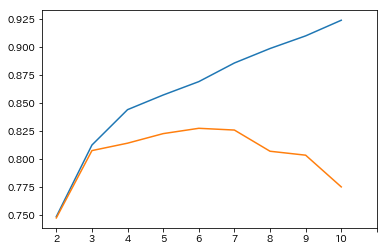

In [73]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks([0,1,2,3,4,5,6,7,8,9],[2,3,4,5,6,7,8,9,10])

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [57]:
gcv.best_params_

{'max_depth': 6}

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [58]:
pred = gcv.predict_proba(testX)

In [59]:
pred

array([[ 0.3390411 ,  0.6609589 ],
       [ 0.54751131,  0.45248869],
       [ 0.98031963,  0.01968037],
       ..., 
       [ 0.98031963,  0.01968037],
       [ 0.98031963,  0.01968037],
       [ 0.98031963,  0.01968037]])

In [60]:
pred = pred[:,1]

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [34]:
sample[1] = pred

In [35]:
sample.to_csv("/root/Case2/submit3_bank.csv",index=None,header=None)

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [102]:
clf4 = DT()
clf5 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [103]:
parameter2 = { "max_depth" : list(range(2,11)), "min_samples_leaf" : [5,10,20,50,100,500] }

In [104]:
parameter3 = { "max_depth" : list(range(2,11)), "min_samples_leaf" : [450,500,550,600,650,700] }

In [105]:
parameter2
parameter3

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [450, 500, 550, 600, 650, 700]}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [106]:
gcv2 = GridSearchCV(clf4,parameter2,cv=5,scoring="roc_auc",n_jobs=-1)

In [107]:
gcv3 = GridSearchCV(clf5,parameter3,cv=5,scoring="roc_auc",n_jobs=-1)

In [110]:
gcv2.fit(trainX,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [111]:
gcv3.fit(trainX,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [450, 500, 550, 600, 650, 700]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

4.最適なパラメータはなんだったか確かめてみよう

In [112]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

In [113]:
gcv3.best_params_

{'max_depth': 10, 'min_samples_leaf': 450}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [114]:
pred2 = gcv2.predict_proba(testX)

In [115]:
pred2 = pred2[:,1]

In [116]:
pred3 = gcv3.predict_proba(testX)

In [117]:
pred3 = pred3[:,1]

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

In [118]:
sample[1] = pred2

In [119]:
sample.to_csv("/root/Case2/submit4_bank.csv",header=None,index=None)

In [120]:
sample[1] = pred3 

In [121]:
sample.to_csv("/root/Case2/uni1_submit4_bank.csv",header=None,index=None)